In [1]:
import networkx as nx
from wisdom_of_crowds import Crowd
import random
import datetime
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
BG = nx.generators.random_graphs.fast_gnp_random_graph(5000, 0.0005, seed=1, directed=True)
for node in BG:
    coin = random.randint(0, 1)
    BG.nodes[node]['T'] = coin
print(BG)

start = datetime.datetime.now()
print(start)
hs = [] 
test = Crowd(BG)
for node in test.node_set:
    hs.append(test.h_measure(node))
print("total elapsed:",datetime.datetime.now()-start)

DiGraph with 5000 nodes and 12491 edges
2021-10-27 16:20:27.993884
total elapsed: 0:00:21.329017


[(2, 1292), (3, 1159), (1, 988), (4, 706), (0, 414), (5, 338), (6, 103)]


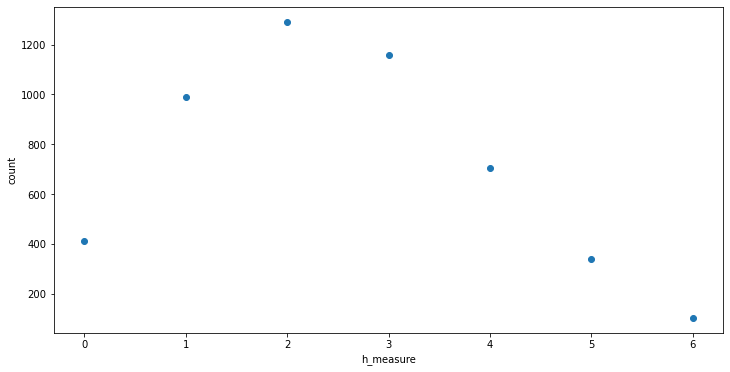

In [3]:
c = Counter(hs)
print(c.most_common())

plt.figure(figsize=(12,6))
xs = range(7)
ys = [c[x] for x in xs]
plt.scatter(xs,ys)
plt.xlabel('h_measure')
plt.ylabel('count')
plt.show()

Generate random small DiGraph to test out D_edge()
Nodes are labelled by the (randomly assigned between 1 and 6) topic they transmit, each transmitting only one.

Node:  0 Topic:  4 Predecessors:  1 2 10 11 
Node:  1 Topic:  2 Predecessors:  5 
Node:  2 Topic:  2 Predecessors:  3 4 6 7 
Node:  3 Topic:  3 Predecessors:  8 
Node:  4 Topic:  6 Predecessors:  
Node:  5 Topic:  3 Predecessors:  9 
Node:  6 Topic:  4 Predecessors:  
Node:  7 Topic:  6 Predecessors:  
Node:  8 Topic:  2 Predecessors:  
Node:  9 Topic:  5 Predecessors:  
Node:  10 Topic:  6 Predecessors:  
Node:  11 Topic:  2 Predecessors:  


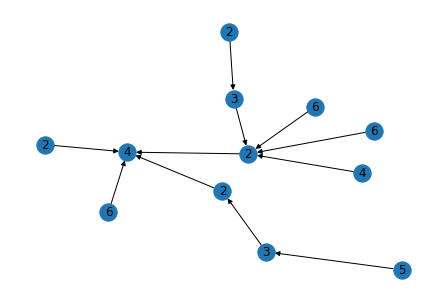

In [14]:
seed = 1  # Seed random number generators for reproducibility
DG = nx.gn_graph(12, seed=seed)
labels = {}
for node in DG:
    die = random.randint(0, 5) + 1
    DG.nodes[node]['T'] = die
    labels[node] = DG.nodes[node]['T'] #using dictionary lookup rather than just assigning value of die as the label to make sure values have been assigned to nodes correctly
    output = str()
    for p in DG.predecessors(node):
        output += str(p)
        output += " "
    print("Node: ", node, "Topic: ", DG.nodes[node]['T'], "Predecessors: ", output)
nx.draw(DG, labels=labels)

edge_test = Crowd(DG)


Test D_edge() on above randomly-generated digraph

In [18]:
#Implementation of D_edge outside of the Crowd class

def edge_topics(v):
	"""
	Recursively determines what topics are transmitted by vertex v, these
		being those transmitted by its informants as well as v's own topic(s)
	:param v: vertex to evaluate
	:returns: set
	"""
	#print("Calling edge_topics() for node ", v)
	topics = set()

	#first, topics transmitted by this node must include the topics transmitted by v itself
	self_topics =  DG.nodes[v]['T']
	if type(self_topics) == int: topics.add(self_topics) #the data parser typically gives only one topic per node
	if type(self_topics) == set: topics = self_topics #if the data parser allows giving multiple topics per node
	print("Node", v, "'s topic: ", topics)	

	#Secondly, the topics transmitted by v include those transmitted by its informants
	source_edges = DG.in_edges(v)
	for edge in source_edges:  # include the topics transmitted by v's informants
		for t in edge_topics(edge[0]): topics.add(t)
		#print("Edge: ",edge, DG.nodes[edge[0]]['T'])
		#topics.add(DG.nodes[edge[0]]['T'])
		#print("Topics: ", topics)
	for edge in DG.out_edges(v): DG.edges[edge]['T'] = topics
	#for edge in DG.out_edges(v): print("Node", edge[0], "'s outgoing topics currently are ", DG.edges[edge]['T'])
	#print("Final topics for node", v, " ", topics)
	return topics


def D_edge(v):
	"""
	Calculating D edge-wise by seeing which topics are transmitted by the 
		informants of vertex v per (Sullivan et al. 2020)
	:param v: vertex to evaluate
	:returns: integer D_edge, in range 0 <= D_edge
	"""
	print("Calling D_edge() for node ", v) 
	in_topics = set()
	for edge in DG.predecessors(v):
		t = edge_topics(edge)
		for i in t: in_topics.add(i)
	print("Inbound topics for node", v, "are ", in_topics)
	return len(in_topics)

print("D is", D_edge(8))

Calling D_edge() for node  8
Inbound topics for node 8 are  set()
D is 0
